# gradient descent

In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv("./boston_housing.csv")
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
clean_data=data[["RM","MEDV"]].values
clean_data

array([[6.5750e+00, 5.0400e+05],
       [6.4210e+00, 4.5360e+05],
       [7.1850e+00, 7.2870e+05],
       [6.9980e+00, 7.0140e+05],
       [7.1470e+00, 7.6020e+05],
       [6.4300e+00, 6.0270e+05],
       [6.0120e+00, 4.8090e+05],
       [6.1720e+00, 5.6910e+05],
       [5.6310e+00, 3.4650e+05],
       [6.0040e+00, 3.9690e+05],
       [6.3770e+00, 3.1500e+05],
       [6.0090e+00, 3.9690e+05],
       [5.8890e+00, 4.5570e+05],
       [5.9490e+00, 4.2840e+05],
       [6.0960e+00, 3.8220e+05],
       [5.8340e+00, 4.1790e+05],
       [5.9350e+00, 4.8510e+05],
       [5.9900e+00, 3.6750e+05],
       [5.4560e+00, 4.2420e+05],
       [5.7270e+00, 3.8220e+05],
       [5.5700e+00, 2.8560e+05],
       [5.9650e+00, 4.1160e+05],
       [6.1420e+00, 3.1920e+05],
       [5.8130e+00, 3.0450e+05],
       [5.9240e+00, 3.2760e+05],
       [5.5990e+00, 2.9190e+05],
       [5.8130e+00, 3.4860e+05],
       [6.0470e+00, 3.1080e+05],
       [6.4950e+00, 3.8640e+05],
       [6.6740e+00, 4.4100e+05],
       [5.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")


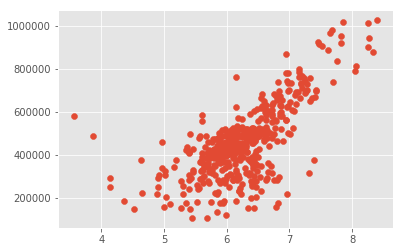

In [6]:
plt.scatter(clean_data[:,0],clean_data[:,1])
plt.show()

In [7]:
def errors(b,m,points):
    error=0
    for point in points:
        x=point[0]
        y=point[1]
    error += (y-(m*x+b))**2
    return error/len(points)
errors(0,0,clean_data)


127709631.9018405

In [8]:
def step_gradient(start_m,start_b,points,lr):
    b_gradient=0
    m_gradient=0
    
    N=float(len(points))
    
    for i in range(0,len(points)):


        x=points[i,0]
        y=points[i,1]         
                     
        b_gradient += -(2/N)-(y-(start_m*x)+(start_b))
        m_gradient += -(2/N)-x*(y-(start_m*x)+(start_b))
    
    new_b=start_b-(lr*b_gradient)
    new_m=start_m-(lr*m_gradient)
    return (new_b,new_m)
step_gradient(0,0,clean_data,0.0001)
                       

(22217.370200000078, 142263.65096)

In [14]:
points = clean_data

lr = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000

b = initial_b
m = initial_m
first_error = errors(m,b,points)
print("We are starting at  b = ",initial_b," m = ", initial_m, "start error= ", first_error )
error_list = []
for i in range(num_iterations):
    
    b,m = step_gradient(b,m, points, lr)
    error_list.append(errors(m,b,points))
    
print("Ending at b = ", b, " m = ", m, "error = ", error_list[-1])


We are starting at  b =  0  m =  0 start error=  127709631.9018405
Ending at b =  87746.02662225626  m =  88001.11089774087 error =  275752409.20920753


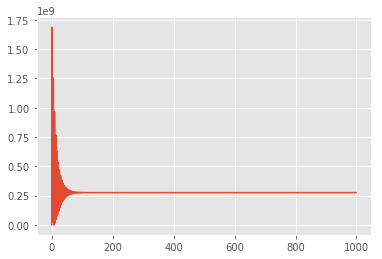

In [15]:
plt.plot(error_list)

In [16]:
x=np.arange(0,10)
print(x)
y=m*x+b
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 87746.02662226 175747.13752    263748.24841774 351749.35931548
 439750.47021322 527751.58111096 615752.6920087  703753.80290644
 791754.91380418 879756.02470192]


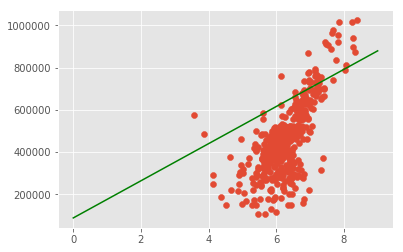

In [17]:
plt.scatter(clean_data[:,0],clean_data[:,1])
plt.plot(x,y,c="g")